In [1]:
#Imports
import joblib
import pandas as pd
import numpy as np
from io import BytesIO
from PIL import Image
import base64
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, PanTool, WheelZoomTool, ColumnDataSource, CategoricalColorMapper
from bokeh.layouts import widgetbox, gridplot
from bokeh.models.widgets import Div
from bokeh.palettes import Spectral10
from bokeh.models.callbacks import CustomJS

import holoviews
from holoviews.operation.datashader import datashade, rasterize, shade, dynspread
from holoviews.plotting.util import process_cmap

import datashader
from colorcet import fire, blues

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

output_notebook(hide_banner=True)
holoviews.extension('bokeh', logo=False)

from IPython.display import display, HTML

In [2]:
cell_meta = joblib.load("../intermediate_data/cell_meta.joblib")
embedding = joblib.load("../intermediate_data/full_normed_embedding_pca20_umap2_spectral_30_0_euclid/umap_embedding.joblib")
embedding = pd.concat([cell_meta, pd.DataFrame(embedding, columns=["x", "y"])], axis=1)
embedding

Product Name     Metadata_PlateID Metadata_WellID  \
0        Dihydrocoumarin  MFGTMP_191029100001             E03   
1        Dihydrocoumarin  MFGTMP_191029100001             E03   
2        Dihydrocoumarin  MFGTMP_191029100001             E03   
3        Dihydrocoumarin  MFGTMP_191029100001             E03   
4        Dihydrocoumarin  MFGTMP_191029100001             E03   
...                  ...                  ...             ...   
1480144              NaN  MFGTMP_191008090001             P24   
1480145              NaN  MFGTMP_191008090001             P24   
1480146              NaN  MFGTMP_191008090001             P24   
1480147              NaN  MFGTMP_191008090001             P24   
1480148              NaN  MFGTMP_191008090001             P24   

         Number_Object_Number  Concentration  Condition  \
0                           1        9.99776  Treatment   
1                           2        9.99776  Treatment   
2                           3        9.99776  Treatment   
3                           4        9.99776  Treatment   
4                           5        9.99776  Treatment   
...                       ...            ...        ...   
1480144                    60            NaN         PC   
1480145                    61            NaN         PC   
1480146                    62            NaN         PC   
1480147                    63            NaN         PC   
1480148                    64            NaN         PC   

                               Unique         x         y  
0         1,0,MFGTMP_191029100001,E03  1.118193 -0.641580  
1         2,0,MFGTMP_191029100001,E03  1.410534 -1.661456  
2         3,0,MFGTMP_191029100001,E03  0.240738 -0.226456  
3         4,0,MFGTMP_191029100001,E03  1.921228 -1.483851  
4         5,0,MFGTMP_191029100001,E03  2.709930 -1.791934  
...                               ...       ...       ...  
1480144  60,5,MFGTMP_191008090001,P24  5.633638  5.231464  
1480145  61,5,MFGTMP_191008090001,P24  0.689212  6.294750  
1480146  62,5,MFGTMP_191008090001,P24  2.445596  4.747295  
1480147  63,5,MFGTMP_191008090001,P24  4.607257  5.252493  
1480148  64,5,MFGTMP_191008090001,P24  0.720332  6.410671  

[1480149 rows x 9 columns]

In [7]:
cell_features = joblib.load("../intermediate_data/cell_features.joblib")


In [9]:
list(cell_features.columns)


['RadialDistribution_FracAtD_Hoe_ER_12of12',
 'RadialDistribution_FracAtD_Lipids_12of12',
 'RadialDistribution_FracAtD_Mito_12of12',
 'RadialDistribution_MeanFrac_Hoe_ER_10of12',
 'RadialDistribution_MeanFrac_Hoe_ER_11of12',
 'RadialDistribution_MeanFrac_Hoe_ER_12of12',
 'RadialDistribution_MeanFrac_Hoe_ER_8of12',
 'RadialDistribution_MeanFrac_Hoe_ER_9of12',
 'RadialDistribution_MeanFrac_Lipids_10of12',
 'RadialDistribution_MeanFrac_Lipids_11of12',
 'RadialDistribution_MeanFrac_Lipids_12of12',
 'RadialDistribution_MeanFrac_Lipids_8of12',
 'RadialDistribution_MeanFrac_Lipids_9of12',
 'RadialDistribution_MeanFrac_Mito_10of12',
 'RadialDistribution_MeanFrac_Mito_11of12',
 'RadialDistribution_MeanFrac_Mito_8of12',
 'RadialDistribution_MeanFrac_Mito_9of12',
 'RadialDistribution_RadialCV_Hoe_ER_10of12',
 'RadialDistribution_RadialCV_Hoe_ER_11of12',
 'RadialDistribution_RadialCV_Hoe_ER_12of12',
 'RadialDistribution_RadialCV_Hoe_ER_8of12',
 'RadialDistribution_RadialCV_Hoe_ER_9of12',
 'RadialD

# Static plot of UMAP embedding

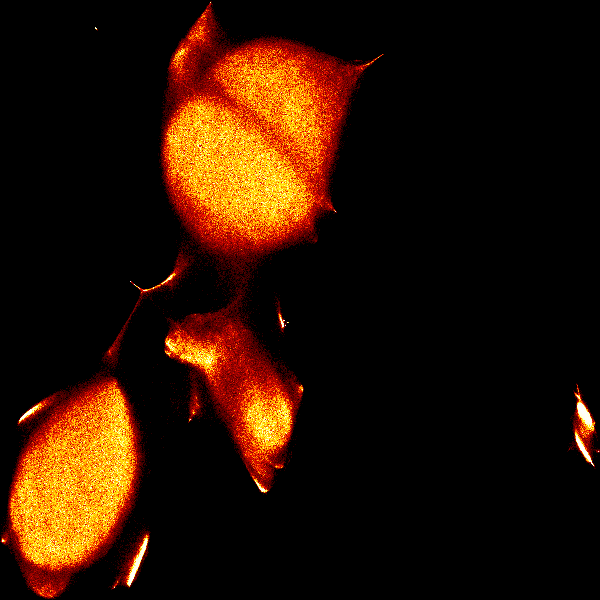

In [3]:
%%output size=300

embed_map = datashader.Canvas()
embed_map = embed_map.points(embedding, 'x', 'y')
embed_map = datashader.transfer_functions.shade(embed_map, cmap=fire)
embed_map = datashader.transfer_functions.set_background(embed_map, "black")
embed_map

# Interactive plot of the UMAP embedding:

In [4]:
%%output size=300

cmap = process_cmap('fire', provider='matplotlib')
Steatosis113_points = holoviews.Points(embedding, ['x', 'y'], group='Embedding', label='Steatosis113')
Steatosis113_map = rasterize(Steatosis113_points)
Steatosis113_map = shade(Steatosis113_map, cmap=cmap)
Steatosis113_map = dynspread(Steatosis113_map, threshold=0.4)
Steatosis113_map = Steatosis113_map.options(bgcolor='black')
Steatosis113_map

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

# Interactive UMAP with tooltips

In [11]:
%%output size=250


#tooltips = [
#    ('Substance', '@{Product Name}'),
#    ('Concentration', '@Concentration'),
#    ('Condition', '@Condition'),
#]
#hover = HoverTool(tooltips=tooltips)


cmap = process_cmap('fire', provider='matplotlib')
Steatosis113_points = holoviews.Points(embedding, ['x', 'y'], vdims=['Condition', 'Product Name', 'Concentration'], label='Steatosis113')
Steatosis113_map = rasterize(Steatosis113_points)
Steatosis113_map = shade(Steatosis113_map, cmap=cmap)
Steatosis113_map = dynspread(Steatosis113_map, threshold=0.5)
Steatosis113_map = Steatosis113_map.options(bgcolor='black')

# overlay sampled points to for the tooltips, it is dynamic so it samples more points as you zoom in
from holoviews.operation import decimate
decimate.max_samples=5000
hover_points = decimate(Steatosis113_points)
hover_points.opts(tools=['hover'], alpha=0)
(Steatosis113_map * hover_points)

:DynamicMap   []
   :Overlay
      .RGB.Steatosis113    :RGB   [x,y]   (R,G,B,A)
      .Points.Steatosis113 :Points   [x,y]   (Condition,Product Name,Concentration)